# CDSDS 542 Deep Learning for Data Science - Discussion 2


[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DL4DS/fa2026_discussions/blob/main/discussion_2.ipynb)

In [33]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.set_printoptions(precision=6, suppress=True)

## Demo Practice 1:
**Question: Find the cube root of 2 with Gradient Descent.**

To compute $\sqrt[3]{2}$, we can reframe this as a minimization problem for:
$$ L(x) = (x^3 - 2)^2 \geq 0 $$

which achieves its global minimum $L(x)=0$ exactly when $x^3 - 2 = 0 \;\Rightarrow\; x=\sqrt[3]{2}$.

**Gradient (derivative)**: let $f(x)=x^3-2$. Then

$$
L(x)=f(x)^2,\qquad
\frac{dL}{dx} = 2f(x)\cdot f'(x)
= 2(x^3-2)\cdot 3x^2
= 6x^2(x^3-2).
$$

**Critical points**:
Solving $L'(x)=0$ gives

* $x=\sqrt[3]{2}$: global minimizer, $L=0$.
* $x=0$: a stationary point (not a minimum), since $L=4$.


**Update**:

$$
x \;\leftarrow\; x - \eta \,\nabla L(x)
= x - \eta \cdot 6x^2(x^3-2).
$$

* If $x>\sqrt[3]{2}$, then $x^3-2>0\Rightarrow L'(x)>0$, so the step moves $x$ **left**.
* If $x<\sqrt[3]{2}$, then $x^3-2<0\Rightarrow L'(x)<0$, so the step moves $x$ **right**.


**Stopping criteria** (any of these work):

* $|L'(x)| < \varepsilon$ (gradient nearly zero)
* $|x_{t+1}-x_t| < \varepsilon$ (updates very small)
* Loss decrease below tolerance, or max iterations reached


Here we turned an equation-solving problem $x^3-2=0$ into minimizing a residual squared. This is the same trick used later for problems without closed-form inverses (e.g. matrix inverse): replace algebraic solution by optimization, solved via gradient descent.

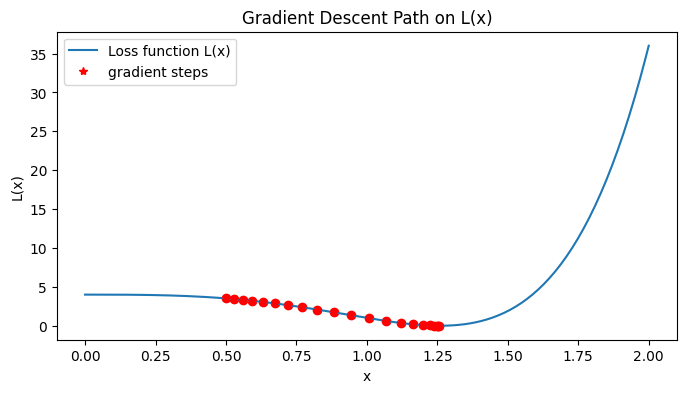

Practice 1 final x (approx cube root of 2) = 1.256079095848351
Practice 1 loss = 0.0003327133151000655


In [34]:
# gradient descent by hand

def loss(x):
    return (x**3 - 2.0)**2

def grad(x):
    return 6.0 * (x**2) * (x**3 - 2.0)

# Gradient descent
x = 0.5     # initial guess
eta = 0.01   # learning rate
steps = 20   # only a few steps for clear visualization

x_hist = [x]
y_hist = [loss(x)]

for t in range(steps):
    x = x - eta * grad(x)
    if t % 1 == 0:       # adjust here
      x_hist.append(x)
      y_hist.append(loss(x))

# Plot the loss curve
xs = np.linspace(0, 2, 200)
ys = loss(xs)

plt.figure(figsize=(8,4))
plt.plot(xs, ys, label="Loss function L(x)")
plt.scatter(x_hist, y_hist, color="red")
plt.plot(x_hist, y_hist, "*", color="red", label="gradient steps")

plt.title("Gradient Descent Path on L(x)")
plt.xlabel("x")
plt.ylabel("L(x)")
plt.legend()
plt.show()

print("Practice 1 final x (approx cube root of 2) =", float(x))
print("Practice 1 loss =", float(loss(x)))


### try with PyTorch

In [35]:
# optional mini-check with PyTorch autograd

x = torch.tensor(0.5, requires_grad=True)  # initial guess
L = (x**3 - 2)**2                          # loss definition
L.backward()                               # compute gradient via autograd and store in x.grad
print("autograd grad:", x.grad.item())
print("manual grad :", 6*x.item()**2*(x.item()**3 - 2))

autograd grad: -2.8125
manual grad : -2.8125


In [41]:
# Now, instead of hand-writing the gradient, let PyTorch autograd do it.

# Create the parameter x as a tensor and tell PyTorch to track its ops.
x = torch.tensor(0.5, requires_grad=True)  # reset initial guess, only Tensors of floating point and complex dtype can require gradients
lr = 0.01          # learning rate (step size)
steps = 1000       # number of gradient descent steps

for step in range(steps):
    # FORWARD PASS: build the computation graph and compute the loss.
    # because x.requires_grad=True, PyTorch records how this scalar 'loss' depends on x.
    loss = (x**3 - 2)**2                # L(x) = (x^3 - 2)^2, a nonnegative scalar we minimize

    # BACKWARD PASS: compute dL/dx automatically via reverse-mode autodiff.
    # after this call, x.grad holds the gradient of 'loss' w.r.t. x.
    loss.backward()

    # PARAMETER UPDATE (no grad tracking during the update):
    # use the gradient to take a step: x := x - lr * dL/dx
    # wrap updates in torch.no_grad() so this in-place change is not added to the graph.
    with torch.no_grad():
        x -= lr * x.grad   # gradient descent step

    # clear the old gradient, PyTorch accumulates gradients by default, so we must zero it before the next iteration.
    x.grad.zero_()

print("Practice 1 final x (approx cube root of 2) with torch =", x.item())
print("Practice 1 loss with torch =", loss.item())
print("True cube root of 2 =", 2**(1/3))

Practice 1 final x (approx cube root of 2) with torch = 1.2599209547042847
Practice 1 loss with torch = 2.2737367544323206e-13
True cube root of 2 = 1.2599210498948732


1. try x=1.0, x=2.0, any difference? There's no difference. That's because both are non-stationary points (gradient != 0).  
2. try lr=0.1, lr=0.5 with different steps? Because the learning rate is too large, it blows up as the large step size overshoots.
3. try x=0, what happens, why? it remains at zero because it's a stationary point where dL/dx = 0 creating a flat spot that's not the minimum.

to learn more about pytorch autograd: https://docs.pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html


## Exercise 1: Find any real root of $f(x)=x^3-2x^2$

Follow the 1, you can keep using: $ L(x) = (x^3 - 2x^2)^2$

**Print out `final_x` at the end for grading.**


In [51]:
# TODO: You may start from any initial x (e.g., x=0.5), choose learning rate, and iterate with your chosen steps.

x = torch.tensor(1.5, requires_grad=True)  # you may change init
lr = 0.05                                 # you may change lr
steps = 2000                                # you may change steps

def loss_fn_ex1(x):

    # TODO: Implement gradient descent to minimize L(x) = (x^3 - 2x^2)^2
    L = (x**3 - 2*x**2)**2
    return L

for t in range(steps):
    loss = loss_fn_ex1(x)
    loss.backward()
    with torch.no_grad():

        # TODO: update x with `lr` and `x.grad`
        x -= lr * x.grad
        x.grad.zero_()

print("Exercise1: final x =", x.item())
# Expected output: any number ≈ 0 or 2

Exercise1: final x = 2.0


## Demo Practice 2

**Question: Fit a quadratic $y\approx ax^2+bx+c$ with Gradient Descent.**

Also, usually given as data $ (x_i,y_i)$, minimize mean squared error:  $ L(a,b,c) = \frac{1}{n}\sum_i (a x_i^2 + b x_i + c - y_i)^2 $

**Model:** $\hat y_i = a x_i^2 + b x_i + c$

**Loss:** $e_i = \hat y_i - y_i = (a x_i^2 + b x_i + c - y_i)$

MSE loss function: $L(a,b,c) = \frac{1}{n} \sum_{i=1}^n e_i^2 $

In [52]:
# Generate synthetic data
rng = np.random.default_rng(42)
n = 100
a_true, b_true, c_true = 1.5, -0.7, 0.9
x_np = np.linspace(-2.0, 2.0, n)
y_np = a_true * x_np**2 + b_true * x_np + c_true + 0.1 * rng.standard_normal(n)  # all numpy

# Convert data points into torch tensors
x = torch.tensor(x_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

Practice 2: learned (a,b,c) = (1.4875, -0.7105, 0.912)


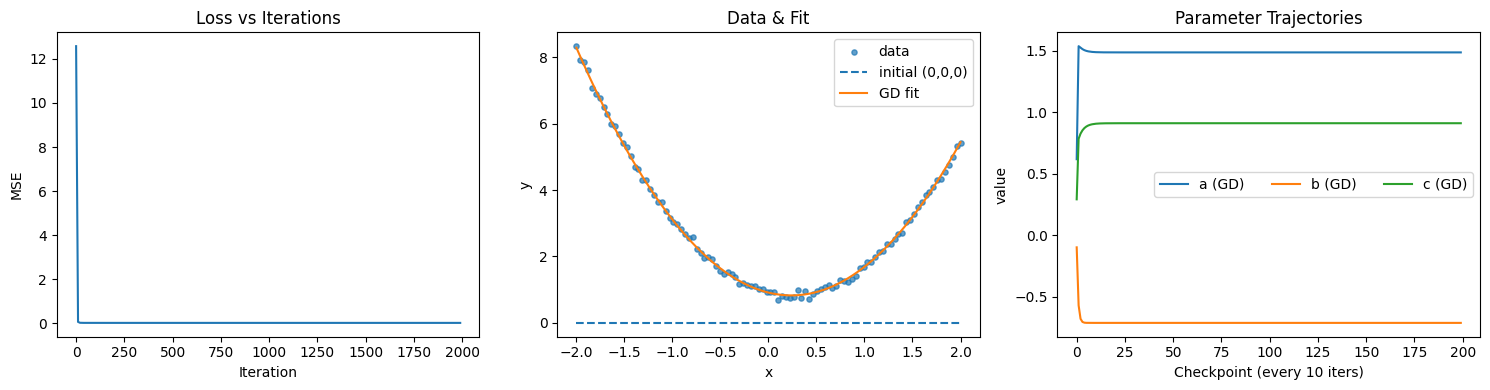

In [53]:
# Parameters
a = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
c = torch.tensor(0.0, requires_grad=True)
lr = 0.05
steps = 2000

loss_hist, a_hist, b_hist, c_hist = [], [], [], []

for t in range(steps):
    y_hat = a*(x**2) + b*x + c
    err = y_hat - y
    loss = torch.mean(err**2)
    loss.backward()
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
        c -= lr * c.grad
        a.grad.zero_(); b.grad.zero_(); c.grad.zero_()
    if t % 10 == 0:
        loss_hist.append(loss.item())
        a_hist.append(a.item()); b_hist.append(b.item()); c_hist.append(c.item())

print("Practice 2: learned (a,b,c) =", (round(a.item(),4), round(b.item(),4), round(c.item(),4)))


# Visualize
fig, axes = plt.subplots(1,3, figsize=(15,4))

axes[0].plot(np.arange(0, steps, 10), loss_hist)
axes[0].set_title("Loss vs Iterations")
axes[0].set_xlabel("Iteration"); axes[0].set_ylabel("MSE")

x_plot = np.linspace(x_np.min(), x_np.max(), 400)
x_plot_t = torch.tensor(x_plot, dtype=torch.float32)
with torch.no_grad():
    y_init = torch.zeros_like(x_plot_t)
    y_gd   = a*(x_plot_t**2) + b*x_plot_t + c
axes[1].scatter(x_np, y_np, s=14, alpha=0.7, label="data")
axes[1].plot(x_plot, y_init.numpy(), "--", label="initial (0,0,0)")
axes[1].plot(x_plot, y_gd.numpy(), label="GD fit")
axes[1].set_title("Data & Fit"); axes[1].legend()
axes[1].set_xlabel("x"); axes[1].set_ylabel("y")

axes[2].plot(a_hist, label="a (GD)")
axes[2].plot(b_hist, label="b (GD)")
axes[2].plot(c_hist, label="c (GD)")
axes[2].set_title("Parameter Trajectories")
axes[2].set_xlabel("Checkpoint (every 10 iters)"); axes[2].set_ylabel("value")
axes[2].legend(ncol=3)
plt.tight_layout(); plt.show()

**Another perspective**

**Model:**
$ y = a x^2 + b x + c$ (linear in the parameters $a,b,c$, though nonlinear in $x$).

**Loss (mean squared error):** Define the matrix $ \Phi \in \mathbb{R}^{n\times 3}$ with columns $[x^2,\;x,\;1]$, parameter vector $\theta=[a,b,c]^T$, and $y\in\mathbb{R}^n$.
Then $L(\theta)=\frac{1}{n}\|\Phi\theta - y\|_2^2$.

**Gradient (derivative wrt parameters)**
Let $e=\Phi\theta-y$ (the residual vector). Then $\nabla_\theta L = \frac{2}{n}\,\Phi^{\!\top}(\Phi\theta - y)$

**Update:**

$$
\theta \leftarrow \theta \;-\;\eta\,\nabla_\theta L
= \theta - \eta\cdot \frac{2}{n}\,\Phi^{\!\top}(\Phi\theta - y).
$$

$L(\theta)$ is a convex quadratic in $\theta$. If $\Phi$ has full column rank (the three columns are linearly independent), the minimizer is **unique**. If not (e.g., strong collinearity or too few/degenerate $x$ values), there are infinitely many minimizers; GD still drives the loss down and (with certain inits/regularizers) tends toward a particular solution.

Practice 2 (matrix form): learned (a,b,c) = (np.float32(1.4878), np.float32(-0.7105), np.float32(0.9112))


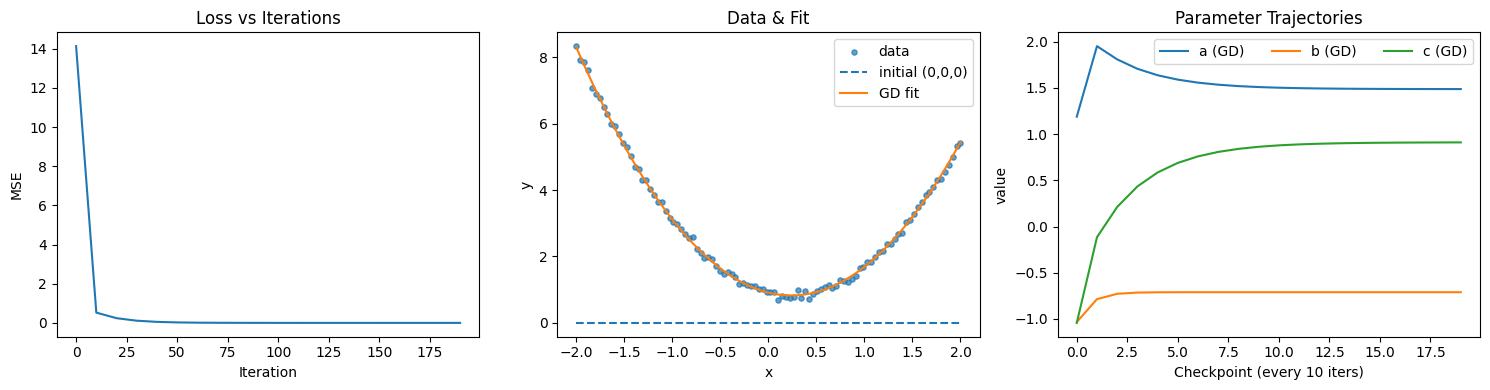

In [58]:
# reload data
if 'x_np' not in locals(): x_np = x.detach().cpu().numpy()
if 'y_np' not in locals(): y_np = y.detach().cpu().numpy()

# Parameters (matrix form)
Phi = torch.stack([x**2, x, torch.ones_like(x)], dim=1)  # shape [n,3]
theta = torch.randn(3, dtype=torch.float32, requires_grad=True)  # [a,b,c]
lr = 0.05
steps = 200

loss_hist, theta_hist = [], []

for t in range(steps):
    y_hat = Phi @ theta
    err = y_hat - y
    loss = torch.mean(err**2)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()
    if t % 10 == 0:
        loss_hist.append(loss.item())
        theta_hist.append(theta.detach().cpu().numpy().copy())

print("Practice 2 (matrix form): learned (a,b,c) =", tuple(round(v,4) for v in theta.detach().cpu().numpy()))


# Visualize
fig, axes = plt.subplots(1,3, figsize=(15,4))

axes[0].plot(np.arange(0, steps, 10), loss_hist)
axes[0].set_title("Loss vs Iterations")
axes[0].set_xlabel("Iteration"); axes[0].set_ylabel("MSE")

x_plot = np.linspace(x_np.min(), x_np.max(), 400).astype(np.float32)
Phi_plot = np.stack([x_plot**2, x_plot, np.ones_like(x_plot)], axis=1)
Phi_plot_t = torch.tensor(Phi_plot, dtype=torch.float32)
with torch.no_grad():
    y_init = Phi_plot_t @ torch.zeros(3)
    y_gd   = Phi_plot_t @ theta
axes[1].scatter(x_np, y_np, s=14, alpha=0.7, label="data")
axes[1].plot(x_plot, y_init.numpy(), "--", label="initial (0,0,0)")
axes[1].plot(x_plot, y_gd.numpy(), label="GD fit")
axes[1].set_title("Data & Fit"); axes[1].legend()
axes[1].set_xlabel("x"); axes[1].set_ylabel("y")

theta_hist = np.array(theta_hist)  # shape [T,3]
axes[2].plot(theta_hist[:,0], label="a (GD)")
axes[2].plot(theta_hist[:,1], label="b (GD)")
axes[2].plot(theta_hist[:,2], label="c (GD)")
axes[2].set_title("Parameter Trajectories")
axes[2].set_xlabel("Checkpoint (every 10 iters)"); axes[2].set_ylabel("value")
axes[2].legend(ncol=3)
plt.tight_layout(); plt.show()

Try with another set of [a, b, c]?

I changed theta = torch.zeros(3, dtype=torch.float32, requires_grad=True) to theta = torch.randn(3,  dtype=torch.float32, requires_grad=True) to select three random starts. We converge at the same values.


## Exercise 2: Try to invert an $n\times n$ matrix by Gradient Descent

Given an invertible matrix **$A$**, learn **$A^{-1}$** by minimizing : $ L = \| A\,A^{-1} - I \|_F^2$. Print `A_inv` and `A @ A_inv` for each test case.

Fill the matrix inverse function for grade.

In [59]:
# TODO: implement matrix invert function below

def invert_by_gd(A, steps=2000, lr=0.1, seed=0):

    torch.manual_seed(seed)
    n = A.shape[0]

    # Random initialization of A_inv
    A_inv = torch.randn(n, n, dtype=A.dtype, device=A.device, requires_grad=True)
    I = torch.eye(n, dtype=A.dtype, device=A.device)

    for t in range(steps):

        # Step 1: TODO: Compute loss with residual R = A @ A_inv - I
        R = A @ A_inv - I
        loss = torch.sum(R ** 2)

        # Step 2: TODO: Gradient descent
        loss.backward()
        with torch.no_grad():
            A_inv = A_inv - lr * A_inv.grad
        A_inv.requires_grad_(True)
        A_inv.grad = None

    return A_inv

In [67]:
# Test cases

if __name__ == "__main__":

    # Test 1: Identity matrix
    A1 = torch.eye(4, dtype=torch.float32)
    A1_inv = invert_by_gd(A1, steps=300, lr=0.5)
    print("Exercise2 - Test1 (Identity)")
    print("A_inv =\n", torch.round(A1_inv, decimals=6))
    print("A @ A_inv =\n", torch.round(A1 @ A1_inv, decimals=6))
    print()

    # Test 2: Permutation matrix
    P = torch.tensor([[0,1,0,0],
                      [1,0,0,0],
                      [0,0,0,1],
                      [0,0,1,0]], dtype=torch.float32)
    A2_inv = invert_by_gd(P, steps=800, lr=0.2)
    print("Exercise2 - Test2 (Permutation)")
    print("A_inv =\n", torch.round(A2_inv, decimals=6))
    print("A @ A_inv =\n", torch.round(P @ A2_inv, decimals=6))
    print()

    # Test 3: Dense matrix
    torch.manual_seed(1)
    A3 = torch.randn(4, 4, dtype=torch.float32)
    A3 = A3 + 2 * torch.eye(4, dtype=torch.float32)
    A3_inv = invert_by_gd(A3, steps=100000, lr=0.05)
    print("Exercise2 - Test3 (Dense)")
    print("A =\n", torch.round(A3, decimals=6))
    print("A_inv =\n", torch.round(A3_inv, decimals=6))
    print("A @ A_inv =\n", torch.round(A3 @ A3_inv, decimals=6))

Exercise2 - Test1 (Identity)
A_inv =
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], grad_fn=<RoundBackward1>)
A @ A_inv =
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], grad_fn=<RoundBackward1>)

Exercise2 - Test2 (Permutation)
A_inv =
 tensor([[-0., 1., -0., -0.],
        [1., 0., -0., -0.],
        [0., -0., 0., 1.],
        [0., 0., 1., -0.]], grad_fn=<RoundBackward1>)
A @ A_inv =
 tensor([[1., 0., -0., -0.],
        [-0., 1., -0., -0.],
        [0., 0., 1., -0.],
        [0., -0., 0., 1.]], grad_fn=<RoundBackward1>)

Exercise2 - Test3 (Dense)
A =
 tensor([[ 0.4744, -0.7502, -0.6540, -1.6095],
        [-0.1002,  1.3908, -0.9798, -1.6091],
        [-0.7121,  0.3037,  1.2227, -0.2515],
        [-0.2223,  1.6871,  0.2284,  2.4676]])
A_inv =
 tensor([[ 5.7555, -1.1129,  1.5907,  3.1904],
        [ 1.5066,  0.0648,  0.6538,  1.0916],
        [ 2.8191, -0.6811,  1.4911,  1

## Demo Practice 3: Multi-class problem

In [61]:
# Generate synthetic data (3-class in 2D)
torch.manual_seed(0)
n_per_class = 50
X1 = torch.randn(n_per_class, 2) + torch.tensor([2, 0])
X2 = torch.randn(n_per_class, 2) + torch.tensor([-2, 0])
X3 = torch.randn(n_per_class, 2) + torch.tensor([0, 2])
X = torch.cat([X1, X2, X3], dim=0)  # shape [n,2]
y = torch.cat([
    torch.zeros(n_per_class, dtype=torch.long),
    torch.ones(n_per_class, dtype=torch.long),
    2*torch.ones(n_per_class, dtype=torch.long)
], dim=0)  # labels 0,1,2

n, d = X.shape
C = 3  # number of classes

Demo Practice 3: Training accuracy = 0.8667


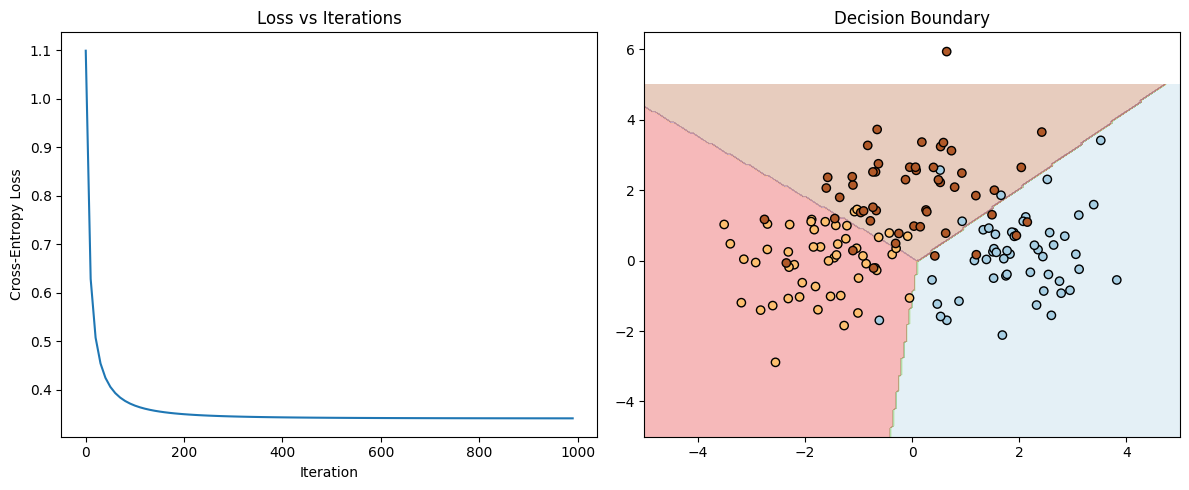

In [62]:
# initialize parameters
W = torch.zeros(d, C, requires_grad=True)
b = torch.zeros(C, requires_grad=True)
lr = 0.1
steps = 1000
loss_hist = []

for t in range(steps):
    # logits
    logits = X @ W + b        # shape [n,C]
    y_hat = torch.softmax(logits, dim=1)                      # probs
    loss = torch.nn.functional.nll_loss(torch.log(y_hat), y)  # cross-entropy loss
    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad
        W.grad.zero_(); b.grad.zero_()

    if t % 10 == 0:
        loss_hist.append(loss.item())

# training accuracy
with torch.no_grad():
    preds = torch.argmax(X @ W + b, dim=1)
    acc = (preds == y).float().mean().item()

print("Demo Practice 3: Training accuracy =", round(acc, 4))

# visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(np.arange(0, steps, 10), loss_hist)
axes[0].set_title("Loss vs Iterations")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Cross-Entropy Loss")

xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = torch.argmax(grid @ W + b, dim=1).numpy()
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
axes[1].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolor="k")
axes[1].set_title("Decision Boundary")
plt.tight_layout()
plt.show()
